# Projeto 1 - Grafos - Lucas Dutra e Rafael Makaha
## Contexto
Bob is a farmer. He has a large pasture with many sheep. Recently, he has lost some of them due to wolf attacks. He thus decided to place some shepherd dogs in such a way that all his sheep are protected.  

The pasture is a rectangle consisting of R × C cells. Each cell is either empty, contains a sheep, a wolf or a dog. Sheep and dogs always stay in place, but wolves can roam freely around the pasture, by repeatedly moving to the left, right, up or down to a neighboring cell. When a wolf enters a cell with a sheep, it consumes it. However, no wolf can enter a cell with a dog.  

Initially there are no dogs. Place dogs onto the pasture in such a way that no wolf can reach any sheep, or determine that it is impossible. Note that since you have many dogs, you do not need to minimize their number.  

Input  
First line contains two integers R (1 ≤ R ≤ 500) and C (1 ≤ C ≤ 500), denoting the number of rows and the numbers of columns respectively.  

Each of the following R lines is a string consisting of exactly C characters, representing one row of the pasture. Here, 'S' means a sheep, 'W' a wolf and '.' an empty cell.  

Output  
If it is impossible to protect all sheep, output a single line with the word "No".  

Otherwise, output a line with the word "Yes". Then print R lines, representing the pasture after placing dogs. Again, 'S' means a sheep, 'W' a wolf, 'D' is a dog and '.' an empty space. You are not allowed to move, remove or add a sheep or a wolf.  

If there are multiple solutions, you may print any of them. You don't have to minimize the number of dogs.  

Examples:   
**Input**  
6 6  
..S...  
..S.W.  
.S....  
..W...  
...W..  
......  
**Output**  
Yes  
..SD..  
..SDW.  
.SD...  
.DW...  
DD.W..  
......  
  
  
**Input**  
1 2  
SW  
**Output**  
No  
  
  
Questão disponível em: https://codeforces.com/problemset/problem/948/A  
## Resolução proposta  
* Primeiro passo a ser considerado é, onde encaixar um grafo na questão? A abordagem utilizada será: cada célula incluída no input será um nó, enquanto as arestas serão as ligações entre os nós com os quatro possíveis outros adjacentes.
* Para avaliar vizinhos diretos de um nó, o algoritmo mais correto a ser utilizar é a BFS.
* Como não é necessário minimizar o número de cachorros, basta apenas colocá-los em todas as células vazias.
* Além da resolução do problema, exibiremos uma visualização gráfica do grafo resultante

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
rows_number, columns_number = input().split()
rows_number = int(rows_number)
columns_number = int(columns_number)
farm = {}

6 6


In [4]:
# for _ in range(rows_number):
#     farm_row = [c for c in input()]
#     farm.append(farm_row)
    
for i in range(rows_number):
    linha = [c for c in input()]
    for index,c in enumerate(linha):
        farm[(i* rows_number) + index] = c
        
farm

..S...
..S.W.
.S....
..W...
...W..
......


{0: '.',
 1: '.',
 2: 'S',
 3: '.',
 4: '.',
 5: '.',
 6: '.',
 7: '.',
 8: 'S',
 9: '.',
 10: 'W',
 11: '.',
 12: '.',
 13: 'S',
 14: '.',
 15: '.',
 16: '.',
 17: '.',
 18: '.',
 19: '.',
 20: 'W',
 21: '.',
 22: '.',
 23: '.',
 24: '.',
 25: '.',
 26: '.',
 27: 'W',
 28: '.',
 29: '.',
 30: '.',
 31: '.',
 32: '.',
 33: '.',
 34: '.',
 35: '.'}

In [5]:
cows_farm = nx.Graph()
# t = {
#     1:'a',
#     2:'b'
# }
# cows_farm.add_node(t[1])
# cows_farm.add_node(t[2])

# cows_farm.add_edge(t[1],t[2])

# j = {}

# for i in range(rows_number):
#     linha = [c for c in input()]
#     for index,c in enumerate(linha):
#         j[(i* rows_number) + index] = c
    
# print(j)

In [6]:
# for row in farm:
#     print(row)

In [24]:
# for i in range(0, rows_number):
#     for j in range(0, columns_number):
# #         print(farm[i][j])
#         cows_farm.add_node(farm[i][j])

for i in range(rows_number * columns_number):
    cows_farm.add_edge(i,i+1)

In [25]:
# cows_farm.add_edges_from([
#     ('.', '.'), 
#     ('.', '.'), 
#     ('.', 'w'), 
#     ('w', 4), 
#     (4,5), 
#     (5, 1)
# ])

for i in range(rows_number * columns_number):
#     cows_farm.add_edge(i * rows_number)
    nx.set_node_attributes(cows_farm,i,farm[i])

In [26]:
cows_farm.node[1]

{'.': 35, 'S': 13, 'W': 27}

C:\Users\Abacaxi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


NetworkXError: Node 10 has no position.

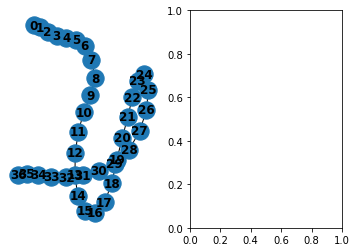

In [20]:
plt.subplot(121)
nx.draw(cows_farm, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw_shell(cows_farm, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')